In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files=[i for i in os.listdir() if 'csv' in i and 'unclean' not in i]
files

['audi.csv',
 'bmw.csv',
 'cclass.csv',
 'focus.csv',
 'ford.csv',
 'hyundi.csv',
 'merc.csv',
 'skoda.csv',
 'toyota.csv',
 'vauxhall.csv',
 'vw.csv']

In [3]:
cars=pd.concat([pd.read_csv(i) for i in files],ignore_index=True)
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN


## EDA

In [4]:
len(cars)

108540

In [5]:
cars.duplicated().sum()

2273

In [6]:
cars.drop_duplicates(inplace=True)
cars.duplicated().sum()

0

In [7]:
cars.isna().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax              13329
mpg               8555
engineSize           0
tax(£)          101493
dtype: int64

In [8]:
cars.dropna(inplace=True,axis=1)

In [9]:
cars.duplicated().sum()

8058

In [10]:
cars.drop_duplicates(inplace=True)
cars.duplicated().sum()

0

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98209 entries, 0 to 108539
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         98209 non-null  object 
 1   year          98209 non-null  int64  
 2   price         98209 non-null  int64  
 3   transmission  98209 non-null  object 
 4   mileage       98209 non-null  int64  
 5   fuelType      98209 non-null  object 
 6   engineSize    98209 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 6.0+ MB


### Model

In [12]:
cars['model'].nunique()

195

In [13]:
cars['model'].value_counts()

 Fiesta     6496
 Focus      4982
 Golf       4791
 C Class    3945
 Corsa      3272
            ... 
 Amica         1
220            1
200            1
 A2            1
 Accent        1
Name: model, Length: 195, dtype: int64

### Year

In [15]:
cars['year'].nunique()

29

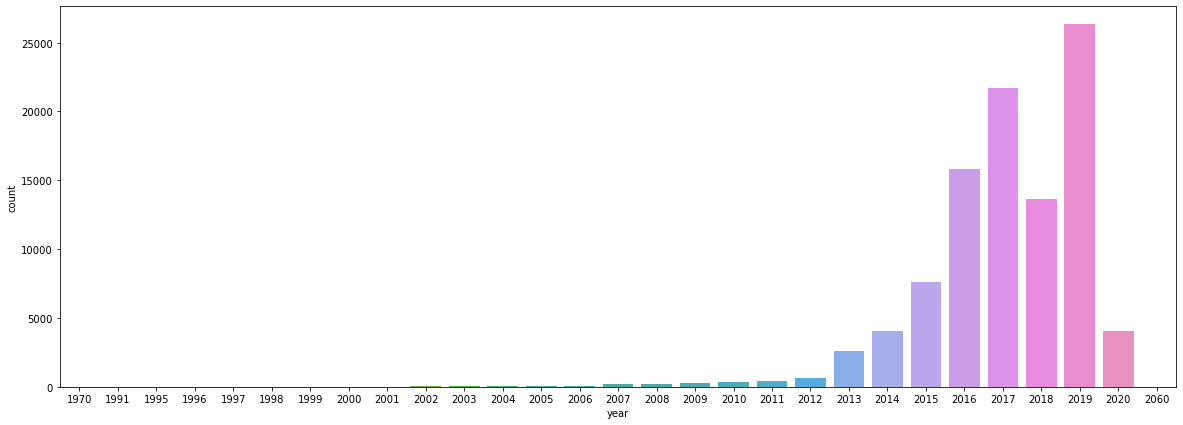

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(data=cars,x='year')

In [21]:
cars=cars[cars['year']!=2020]

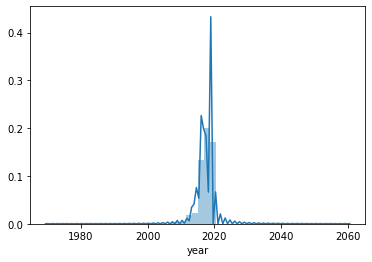

In [18]:
sns.distplot(cars['year'])

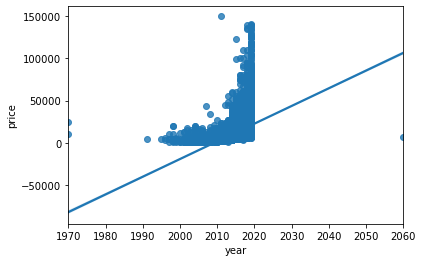

In [22]:
sns.regplot(data=cars,x='year',y='price')

### Transmission

In [24]:
cars['transmission'].nunique()

4

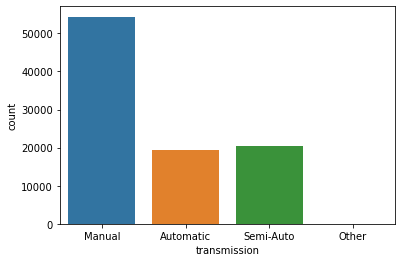

In [25]:
sns.countplot(data=cars,x='transmission')

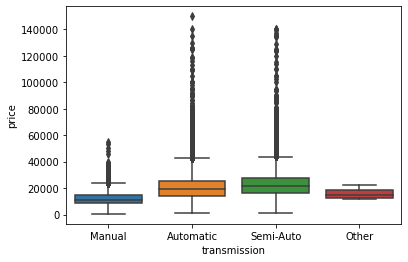

In [26]:
sns.boxplot(data=cars,x='transmission',y='price')

### Mileage

In [27]:
cars['mileage'].nunique()

42070

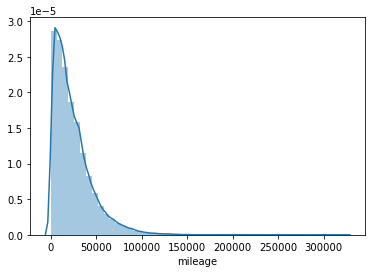

In [28]:
sns.distplot(cars['mileage'])

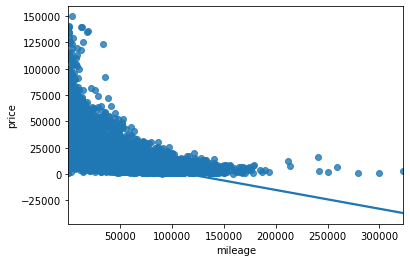

In [30]:
sns.regplot(cars['mileage'],cars['price'])

### Fuel Type

In [33]:
cars['fuelType'].nunique()

5

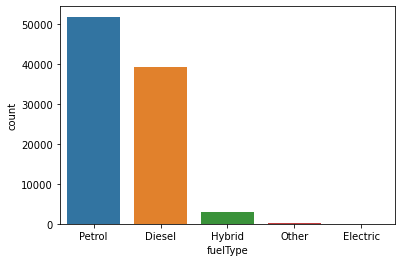

In [34]:
sns.countplot(cars['fuelType'])

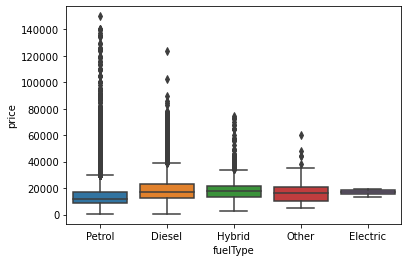

In [35]:
sns.boxplot(data=cars,x='fuelType',y='price')

### Engine Size

In [36]:
cars['engineSize'].nunique()

42

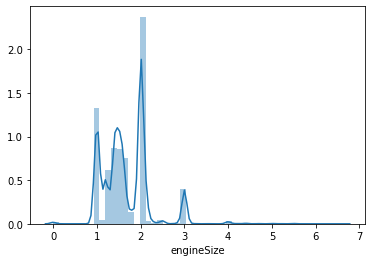

In [37]:
sns.distplot(cars['engineSize'])

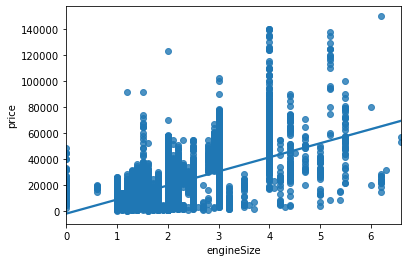

In [38]:
sns.regplot(data=cars,x='engineSize',y='price')

## Feature Engineering

In [39]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [40]:
le=LabelEncoder()
minmax=MinMaxScaler()

In [43]:
cols=cars.select_dtypes(include=['object']).columns

In [46]:
cars[cols]=cars[cols].apply(le.fit_transform)

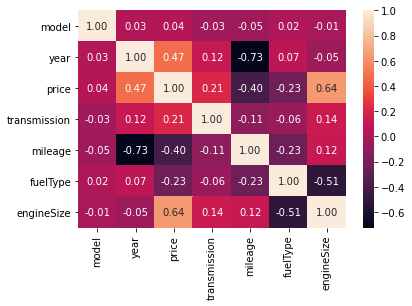

In [47]:
sns.heatmap(cars.corr(),annot=True,fmt='.2f')

In [48]:
from sklearn.feature_selection import SelectKBest,f_regression

In [53]:
feature=SelectKBest(score_func=f_regression,k='all').fit(cars.drop('price',axis=1),cars['price'])
feature=pd.DataFrame(data=feature.scores_,index=[cars.drop('price',axis=1).columns])
feature.sort_values(by=0,ascending=False)

,0
engineSize,65946.349651
year,26564.261042
mileage,18283.815495
fuelType,5388.584067
transmission,4511.519433
model,175.871809


In [79]:
cols=['engineSize','year','mileage','fuelType','transmission']

In [103]:
cars[cols]=minmax.fit_transform(cars[cols])

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

In [105]:
train_x,test_x,train_y,test_y=train_test_split(cars.drop('price',axis=1),cars['price'],test_size=0.2,random_state=89)

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor(n_estimators=1000)
rfr.fit(train_x,train_y)
predict=rfr.predict(test_x)
print('MAE',mean_absolute_error(predict,test_y))
print('R2',r2_score(predict,test_y))

In [108]:
from xgboost import XGBRegressor

In [142]:
xgr=XGBRegressor()
xgr.fit(train_x,train_y)
predict=xgr.predict(test_x)
print('MAE',mean_absolute_error(predict,test_y))
print('R2',r2_score(predict,test_y))

MAE 1341.853446764429
R2 0.9393850343353547
